In [9]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [10]:
muzea2022 = pd.read_csv("muzea2022.csv")
ludnosc2022= pd.read_csv("ludnosc2009.csv")


In [11]:
pow_map = "powiaty.shp"
pow_m = gpd.read_file(pow_map)

In [12]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [13]:
list = [muzea2022, ludnosc2022]

for i in list:
    i.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)

In [14]:
muzea2022.rename(columns={
    'Muzea|muzea łącznie z oddziałami' : 'muzea2022'
}, inplace=True)
ludnosc2022.rename(columns={
    'Ludność wg płci oraz w podziale na miasto i wieś (dane półroczne)|rok|ogółem|ogółem' : 'ludnosc2022'
}, inplace=True)

In [15]:
muzea2022.head()

,powiat,Województwo,muzea2022
0,proszowicki,małopolskie,1.0
1,oświęcimski,małopolskie,4.0
2,ostrzeszowski,wielkopolskie,1.0
3,szczecinecki,zachodniopomorskie,2.0
4,goleniowski,zachodniopomorskie,0.0


In [27]:
ludnosc2022.head()

,powiat,Województwo,ludnosc2022
0,krakowski,małopolskie,253344.0
1,nowosądecki,małopolskie,202701.0
2,tarnowski,małopolskie,195908.0
3,nowotarski,małopolskie,185161.0
4,Sopot,pomorskie,38460.0


In [16]:
muzea2022['powiat'] = muzea2022['powiat'].str.strip()
ludnosc2022['powiat'] = ludnosc2022['powiat'].str.strip()

In [17]:
muzea2022_merge = muzea2022.merge(ludnosc2022, on='powiat')

In [18]:
muzea2022_merge['muzea2022_średnia_powiaty'] = (muzea2022_merge['muzea2022']/muzea2022_merge['ludnosc2022']) * 1000

In [19]:
print(muzea2022_merge[['powiat', 'muzea2022_średnia_powiaty']])

            powiat  muzea2022_średnia_powiaty
0      proszowicki                   0.000023
1      oświęcimski                   0.000026
2    ostrzeszowski                   0.000018
3     szczecinecki                   0.000026
4      goleniowski                   0.000000
..             ...                        ...
393        łosicki                   0.000031
394     sokołowski                   0.000036
395      węgrowski                   0.000030
396   sochaczewski                   0.000048
397    żyrardowski                   0.000040

[398 rows x 2 columns]


In [20]:
print(muzea2022_merge.isnull().sum())   

powiat                       0
Województwo_x                0
muzea2022                    0
Województwo_y                0
ludnosc2022                  0
muzea2022_średnia_powiaty    0
dtype: int64


In [21]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [22]:
print(pow_m.columns)
print(muzea2022.columns)


Index(['gml_id', 'JPT_SJR_KO', 'JPT_POWIER', 'JPT_KOD_JE', 'JPT_NAZWA_',
       'JPT_ORGAN_', 'JPT_JOR_ID', 'WERSJA_OD', 'WERSJA_DO', 'WAZNY_OD',
       'WAZNY_DO', 'JPT_KOD__1', 'JPT_NAZWA1', 'JPT_ORGAN1', 'JPT_WAZNA_',
       'ID_BUFORA_', 'ID_BUFORA1', 'ID_TECHNIC', 'IIP_PRZEST', 'IIP_IDENTY',
       'IIP_WERSJA', 'JPT_KJ_IIP', 'JPT_KJ_I_1', 'JPT_KJ_I_2', 'JPT_OPIS',
       'JPT_SPS_KO', 'ID_BUFOR_1', 'JPT_ID', 'JPT_POWI_1', 'JPT_KJ_I_3',
       'JPT_GEOMET', 'JPT_GEOM_1', 'SHAPE_LENG', 'SHAPE_AREA', 'REGON',
       'RODZAJ', 'geometry'],
      dtype='object')
Index(['powiat', 'Województwo', 'muzea2022'], dtype='object')


In [33]:

pow_m['JPT_NAZWA_clean'] = pow_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False).str.strip()

# Połączenie pow_m z muzea2022
merged_pow_m_muzea2022 = pow_m.merge(muzea2022_merge, left_on='JPT_NAZWA_clean', right_on='powiat', how='left')



In [36]:
missing_powiaty = merged_pow_m_muzea2022[merged_pow_m_muzea2022['muzea2022'].isnull()]
print(missing_powiaty[['JPT_NAZWA_clean', 'muzea2022']])

    JPT_NAZWA_clean  muzea2022
384      karkonoski        NaN
437       Wałbrzych        NaN


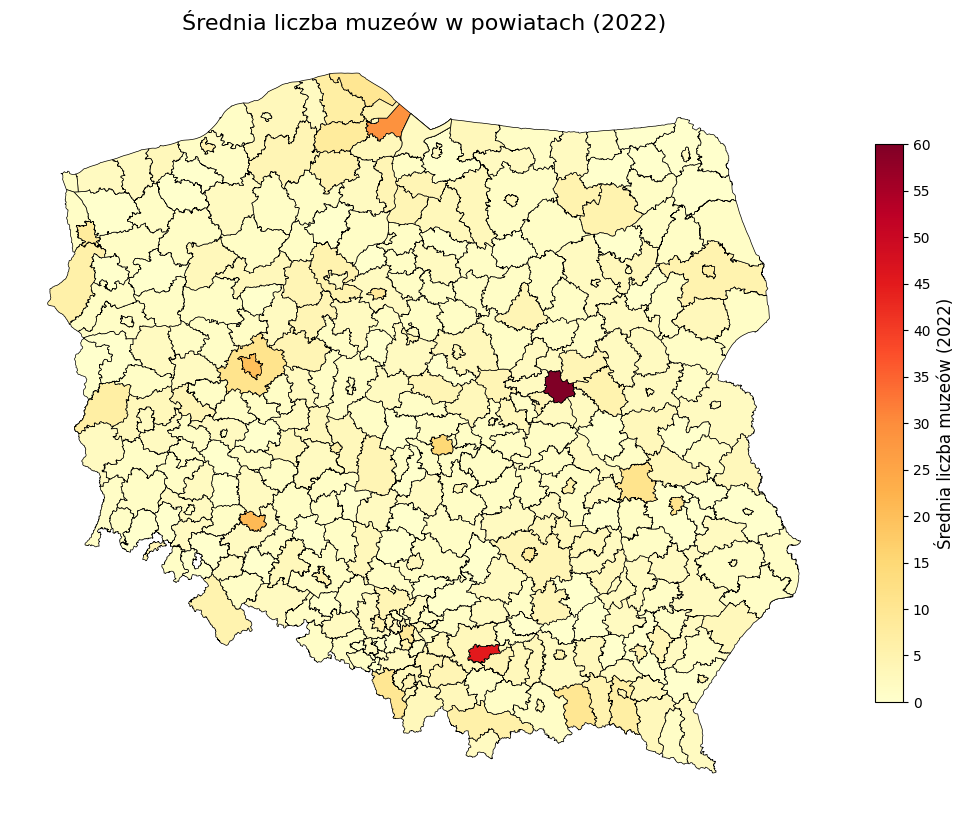

In [35]:

# Rysowanie mapy bez legendy (stworzymy własną legendę)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow_m_muzea2022.plot(
    column='muzea2022',
    cmap='YlOrRd',
    linewidth=0.5,
    edgecolor='black',
    legend=False,  # Wyłączamy domyślną legendę
    ax=ax
)

# Tworzenie własnej legendy kolorów (colorbar)
cmap = mpl.cm.YlOrRd
norm = mpl.colors.Normalize(vmin=0, vmax=merged_pow_m_muzea2022['muzea2022'].max())

# Dodanie paska kolorów z podziałem co 5
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_ticks(np.arange(0, merged_pow_m_muzea2022['muzea2022'].max() + 5, 5))  # Skala co 5
cbar.set_label('Średnia liczba muzeów (2022)', fontsize=12)

# Dostosowanie mapy
ax.set_axis_off()
plt.title('Średnia liczba muzeów w powiatach (2022)', fontsize=16)
plt.show()
